- Used the friends corpus to make verb-phrases (using nltk library and textblobs) and noun-phrases
- Tried to plot a graph connecting various nouns phrases between sentences

In [1]:
import re

In [8]:
# Read text from the file
with open("Friends_Transcript.txt", "r") as file:
    text = file.read()

In [16]:
# Remove character names and colons
pattern_names = re.compile(r'[A-Z][a-z]+:')
text_without_names = re.sub(pattern_names, '', text)

# Remove text within "[ ... ]" brackets
pattern_brackets = re.compile(r'\[[^\]]*\]')
text_without_brackets = re.sub(pattern_brackets, '', text_without_names)

# Split the text into sentences
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text_without_brackets)

# Remove empty lines and handle new line characters
sentences = [re.sub(r'\n', ' ', sentence.strip()) for sentence in sentences if sentence.strip()]

# Remove the ( and ) characters from sentences with ( type brackets
sentences = [re.sub(r'(\(|\))', '', sentence) if '(' in sentence else sentence for sentence in sentences]

# Remove sentences in full capitals and starting with "Written by"
filtered_sentences = []
for sentence in sentences:
    if sentence.isupper() or sentence.startswith("Written by"):
        continue
    filtered_sentences.append(sentence)

# Print the processed sentences
# for idx, sentence in enumerate(filtered_sentences, start=1):
#     print(f"Sentence {idx}: {sentence}")

sentences[:]

["THE ONE WHERE MONICA GETS A NEW ROOMATE THE PILOT-THE UNCUT VERSION Written by: Marta Kauffman & David Crane   There's nothing to tell! He's just some guy I work with!  C'mon, you're going out with the guy! There's gotta be something wrong with him!  All right Joey, be nice.",
 'So does he have a hump?',
 'A hump and a hairpiece?',
 'Wait, does he eat chalk?',
 "They all stare, bemused.  Just, 'cause, I don't want her to go through what I went through with Carl- oh!  Okay, everybody relax.",
 'This is not even a date.',
 "It's just two people going out to dinner and- not having sex.",
 'Sounds like a date to me.',
 "Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realize I am totally naked.",
 'Oh, yeah.',
 'Had that dream.',
 "Then I look down, and I realize there's a phone...",
 'there.',
 'Instead of...?',
 "That's right.",
 'Never had that dream.',
 'No.  All of a sudden, the phone starts to ring.',
 "Now I don't know what to do, everybody 

In [18]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_lg")

In [19]:
# Lists to store extracted noun and verb phrases
noun_phrases = []
verb_phrases = []

# Extract noun phrases and verb phrases using spaCy
for sentence in sentences:
    doc = nlp(sentence)
    noun_phrases.extend([np.text for np in doc.noun_chunks])
    verb_phrases.extend([token.text for token in doc if token.pos_ == "VERB"])

# Remove duplicates from the lists
noun_phrases = list(set(noun_phrases))
verb_phrases = list(set(verb_phrases))

# Print or use the extracted lists as needed
print("Noun Phrases:", noun_phrases)
print("Verb Phrases:", verb_phrases)

Noun Phrases: ['All the lies', 'Sophie sit', 'the coffee house', 'Oh no-no-no-no-no-no, vomit tux', 'Cox', 'this weird idea', 'The hospital', 'those allergy commercials', 'wethead', 'the fricken', 'Oh the phone', 'that stupid friend', 'MAC', 'a liquorice whip', 'THE MUGGING      excited Guys', 'Cat hair', 'this totally hot girl', 'a city', 'eight hours', 'everywhere a chick-chick-Joey enters-chickeeeen', 'a cute butt', 'Its over', 'all this girlie stuff', 'Little engagement gift', 'her freebie list', 'And now your cell', 'his team', 'Phoebe Big surprise', 'Cool, snow', 'laugh', 'the sack', 'the center', 'Female roommate', 'flood damage', 'Cup chandelier', 'a couple of dozen Linzer torts', 'Tribbiani', 'your history', 'Archie Comics', 'your machine', 'Aaah', 'to know-notices Joey-Joey', 'no unselfish good deeds', 'cake', 'some applause', 'game shows', 'Gulliver', 'Free popcorn', "Denis Franz's butt", 'a huge hole', 'free boat', 'free snacks', 'this big smile', 'Donna', 'Alright shrugs',

In [23]:
# Extract verb phrases using spaCy
verb_phrases_act=[]
for sentence in sentences:
    doc = nlp(sentence)
    
    # Find verb phrases with their arguments
    for token in doc:
        if token.pos_ == "VERB":
            verb_phrase = token.text
            children = [child.text for child in token.children if child.dep_ not in ["nsubj", "nsubjpass"]]
            if children:
                verb_phrase += " " + " ".join(children)
            verb_phrases_act.append(verb_phrase)

# Remove duplicates from the list
verb_phrases_act = list(set(verb_phrases_act))

In [25]:
noun_phrases

['All the lies',
 'Sophie sit',
 'the coffee house',
 'Oh no-no-no-no-no-no, vomit tux',
 'Cox',
 'this weird idea',
 'The hospital',
 'those allergy commercials',
 'wethead',
 'the fricken',
 'Oh the phone',
 'that stupid friend',
 'MAC',
 'a liquorice whip',
 'THE MUGGING      excited Guys',
 'Cat hair',
 'this totally hot girl',
 'a city',
 'eight hours',
 'everywhere a chick-chick-Joey enters-chickeeeen',
 'a cute butt',
 'Its over',
 'all this girlie stuff',
 'Little engagement gift',
 'her freebie list',
 'And now your cell',
 'his team',
 'Phoebe Big surprise',
 'Cool, snow',
 'laugh',
 'the sack',
 'the center',
 'Female roommate',
 'flood damage',
 'Cup chandelier',
 'a couple of dozen Linzer torts',
 'Tribbiani',
 'your history',
 'Archie Comics',
 'your machine',
 'Aaah',
 'to know-notices Joey-Joey',
 'no unselfish good deeds',
 'cake',
 'some applause',
 'game shows',
 'Gulliver',
 'Free popcorn',
 "Denis Franz's butt",
 'a huge hole',
 'free boat',
 'free snacks',
 'this 

In [24]:
verb_phrases_act

['read book',
 's out',
 'Listen need',
 'm m , sorry ,',
 'drops Hands , to made',
 'call her and work',
 'end in ?',
 's Yeah , need .',
 'think turning , do do ?',
 'forbid because smoke',
 'need say .',
 'make ca nt it out .',
 'sticks head between Oh !',
 'find na clothes in',
 "have go , wo n't night for .",
 'going m only pretend way .',
 'see to it again on',
 'got let , s meeting .',
 'looking Why am ?',
 'believe what',
 'thinks it over , sits .',
 'sits down with',
 'play to on',
 'poke Ah , Paolo touches , rub',
 'get crushes time',
 'stopped so on by and Did',
 'had Apparently ceremony born .',
 "married least 've been , OH",
 'Puts mushrooms in Joe .',
 'think know',
 'going ve been out for .',
 'gon then re hate .',
 'knows fashion',
 's have',
 'know To Do even is ?',
 'm thank glad .',
 'take breath',
 'says really that ? !',
 'stroking it',
 'have Yknow , find .',
 'give up bag',
 'see like',
 'loves that really',
 'opens then , door )',
 'broke just lamp .',
 'flippe

In [26]:
from textblob import TextBlob

In [30]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [32]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
# List to store extracted verb phrases
verb_phrases_tb = []

# Extract verb phrases using TextBlob
for sentence in sentences[:100]:
    blob = TextBlob(sentence)
    
    # Find verb phrases with their arguments
    for np in blob.noun_phrases:
        if " " in np:
            verb_phrases_tb.append(np)

# Remove duplicates from the list
verb_phrases_tb = list(set(verb_phrases_tb))

# Print or use the extracted list as needed
print("Verb Phrases (TextBlob):", verb_phrases_tb)

Verb Phrases (TextBlob): ['high school', "'re feeling", 'strip joint', "'you 're", 'thank god', "ca n't marry", 'door buzzer sounds', 'oh god', 'wet wedding dress', 'high survivor', 'big hammer', 'new roomate the pilot-the uncut version written', 'the one where monica gets', 'mittens ...', 'rachel de-caff', 'alright ross', 'gravy boat', 'breathe ..', "'s umbrella", 'wedding day', 'phone ...', 'lesbian ...', 'deep voice', 'sleighbells and-', "n't wan na", 're tv', 'neck ...', "'re single", 'egg salad', 'dinner and-', 'wet bridesmaids', "coffeesweet 'n", 'wrong number', 'marta kauffman', "c'mon daddy", 'very-very weird', 'hysterical phone', 'big pipe organ', 'wan na', 'david crane', 'things ...', "n't need", 'potato head', 'oh god monica', 'issue ...', 'small intestine']


In [34]:
verb_phrases_tb

['high school',
 "'re feeling",
 'strip joint',
 "'you 're",
 'thank god',
 "ca n't marry",
 'door buzzer sounds',
 'oh god',
 'wet wedding dress',
 'high survivor',
 'big hammer',
 'new roomate the pilot-the uncut version written',
 'the one where monica gets',
 'mittens ...',
 'rachel de-caff',
 'alright ross',
 'gravy boat',
 'breathe ..',
 "'s umbrella",
 'wedding day',
 'phone ...',
 'lesbian ...',
 'deep voice',
 'sleighbells and-',
 "n't wan na",
 're tv',
 'neck ...',
 "'re single",
 'egg salad',
 'dinner and-',
 'wet bridesmaids',
 "coffeesweet 'n",
 'wrong number',
 'marta kauffman',
 "c'mon daddy",
 'very-very weird',
 'hysterical phone',
 'big pipe organ',
 'wan na',
 'david crane',
 'things ...',
 "n't need",
 'potato head',
 'oh god monica',
 'issue ...',
 'small intestine']

In [41]:
verbs=[]
for sentence in sentences[:100]:
    doc = nlp(sentence)

    for token in doc:
        if token.pos_ == 'VERB':
            verb_phrase = [token.text]
            for child in token.children:
                if child.dep_ in ('advmod', 'aux', 'prt', 'acomp', 'attr'):
                    verb_phrase.insert(1, child.text)
                if child.dep_ == 'VERB':
                    verb_phrase.insert(0, child.text)
            verb_phrase.reverse()
            verbs.append(' '.join(verb_phrase))

# Print all extracted verb phrases
for phrase in verbs:
    print(phrase)

Written
nothing 's
to tell
work
're out going
's
got
So does have
Wait
Wait does eat
stare
Just 'cause do want
to go
went
relax
out going
having
Sounds
'm standing
realize
Had
Then down look
realize
phone 's
had
sudden starts
to ring
Now do know
to do
starts
looking
were before looking
Finally figure
'd better answer
out turns
calls
mortified
says
wanna
kill
just feel
down reached
grabbed
pulled
tied
explaining
out moved
Let
get
starts
to pluck
Stop
cleansing
just alone leave
hope
do
do
left
knew
Why does keep
fixating
did know
how should know
Sometimes wish
stare
Did loud say
told
seemed
to well take
got
sobbing
really 'll have
'll have
're now feeling
're hurting
Can tell
gestures
Have
do want
just-
just wanna
again married
enters
starts
to search
just want
hopefully extends
Thank
just went
then said
Can get
remember
go
to hug
opens
down sits
again defeated
follows
sits
expect
to explain
So wanna now tell
are waiting
started
where were keeping
was looking
brought
realized
more on tur

In [4]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
import networkx as nx
from nltk import ngrams, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [30]:
# Preprocessing: Tokenization and removing stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

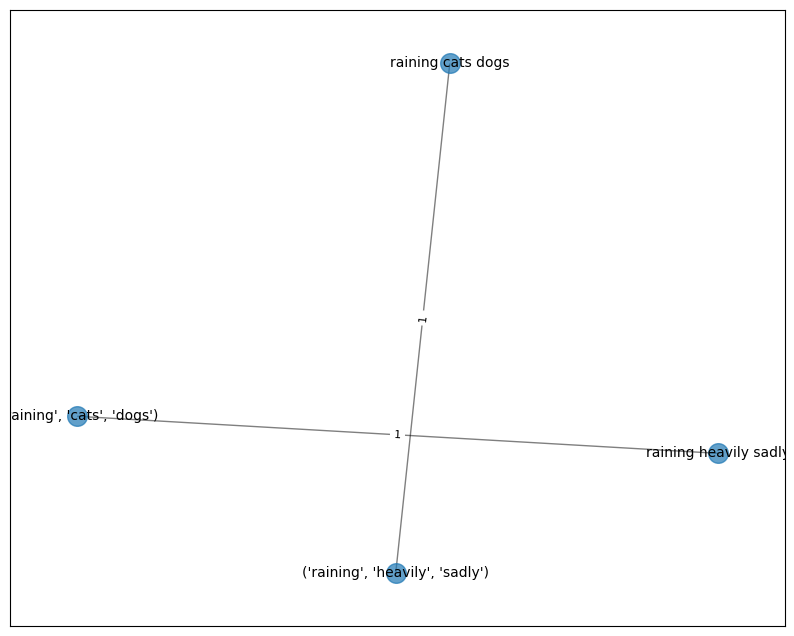

In [36]:

# Sample list of sentences
sentence_list = [
    "It's raining cats and dogs.",
    "It's raining heavily sadly."
]

stop_words = set(stopwords.words("english"))
all_ngrams = []

for sentence in sentence_list:
    tokens = [word.lower() for word in nltk.word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
    bigrams_in_sentence = list(ngrams(tokens, 3))  # Change to ngrams(tokens, 3) for trigrams
    all_ngrams.extend(bigrams_in_sentence)

# Count n-gram occurrences
ngram_counter = Counter(all_ngrams)

# Create a dynamic knowledge graph
graph = nx.Graph()

# Add nodes (n-grams) and edges (n-gram relationships) to the graph
for ngram, count in ngram_counter.items():
    ngram_str = ' '.join(ngram)
    if not graph.has_node(ngram_str):
        graph.add_node(ngram_str)
    for neighbor_ngram, neighbor_count in ngram_counter.items():
        if ngram != neighbor_ngram:
            if not graph.has_edge(ngram_str, neighbor_ngram):
                graph.add_edge(ngram_str, neighbor_ngram, weight=0)
            graph[ngram_str][neighbor_ngram]['weight'] += ngram_counter[neighbor_ngram]

# Visualization
pos = nx.spring_layout(graph)  # You can use other layout algorithms
labels = {node: node for node in graph.nodes()}
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in graph.edges(data=True)}

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(graph, pos, node_size=200, alpha=0.7)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(graph, pos, labels, font_size=10)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
plt.show()

In [21]:
import networkx as nx
import spacy
from nltk import sent_tokenize
import matplotlib.pyplot as plt

In [37]:
nlp = spacy.load("en_core_web_lg")


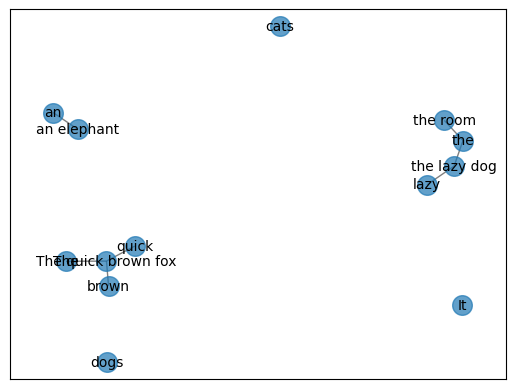

In [52]:

# List of sample texts
texts = [
    "It's raining cats and dogs.",
    "It's raining very heavily.",
    "The quick brown fox jumps over the lazy dog.",
    "There's an elephant in the room."
]

# Create a dynamic knowledge graph
graph = nx.Graph()

# Process each text and extract meaningful phrases using spaCy and noun chunks
for text in texts:
    sentences = sent_tokenize(text)
    for sentence in sentences:
        doc = nlp(sentence)
        
        # Extract noun chunks and add nodes and edges to the graph
        for chunk in doc.noun_chunks:
            chunk_text = chunk.text
            graph.add_node(chunk_text)
            
            # Connect nouns with their modifiers
            for token in chunk:
                if token != chunk.root:
                    graph.add_edge(chunk_text, token.text)

# Visualization
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_size=200, alpha=0.7)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.show()